In [ ]:
#Importing Required Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#download cifar-100 dataset

(train_images,train_labels), (test_images,test_labels) = datasets.cifar100.load_data(label_mode="coarse")

#normalizing the pixel values 0-1
train_images = train_images/255.0
test_images = test_images/255.0

169001437/169001437 [==============================] - 14s 0us/step


In [ ]:
#Shape of train and test sets
print('Training Data Shape:',train_images.shape)
print('Testing Data Shape:',test_images.shape)

#No. of Labels
print('No. of Lables in Train Data:', len(train_labels))
print('No. of Lables in Test Data:', len(test_labels))

Training Data Shape: (50000, 32, 32, 3)
Testing Data Shape: (10000, 32, 32, 3)
No. of Lables in Train Data: 50000
No. of Lables in Test Data: 10000


In [ ]:
#defining a list of class names

class_names = ['Aquatic Mammals','Fish','Flowers','Food Containers','Fruits/Vegetables', 'Electrical Devices',
          'Furniture','Insects','Carnivores','Outdoor Things','Outdoor Scene','Omni/Herbi-vores',
          'Mammals','Invertebrates','People','Reptiles','Small Mammals','Trees',
          'Vehicles 1', 'Vehicles 2']

labels = ['beaver', 'dolphin', 'otter', 'seal', 'whale',
          'aquarium fish', 'flatfish', 'ray', 'shark', 'trout',
          'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
          'bottles', 'bowls', 'cans', 'cups', 'plates',
          'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers',
          'clock', 'computer keyboard', 'lamp','telephone', 'television',
          'bed', 'chair', 'couch', 'table', 'wardrobe',
          'tbee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
          'bear', 'leopard', 'lion', 'tiger', 'wolf',
          'bridge', 'castle', 'house', 'road', 'skyscraper',
          'cloud', 'forest', 'mountain', 'plain', 'sea',
          'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
          'fox', 'porcupine', 'possum', 'raccoon', 'skunk',
          'crab', 'lobster', 'snail', 'spider', 'worm',
          'baby', 'boy', 'girl', 'man', 'woman',
          'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
          'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',
          'maple', 'oak', 'palm', 'pine', 'willow',
          'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train',
          'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']


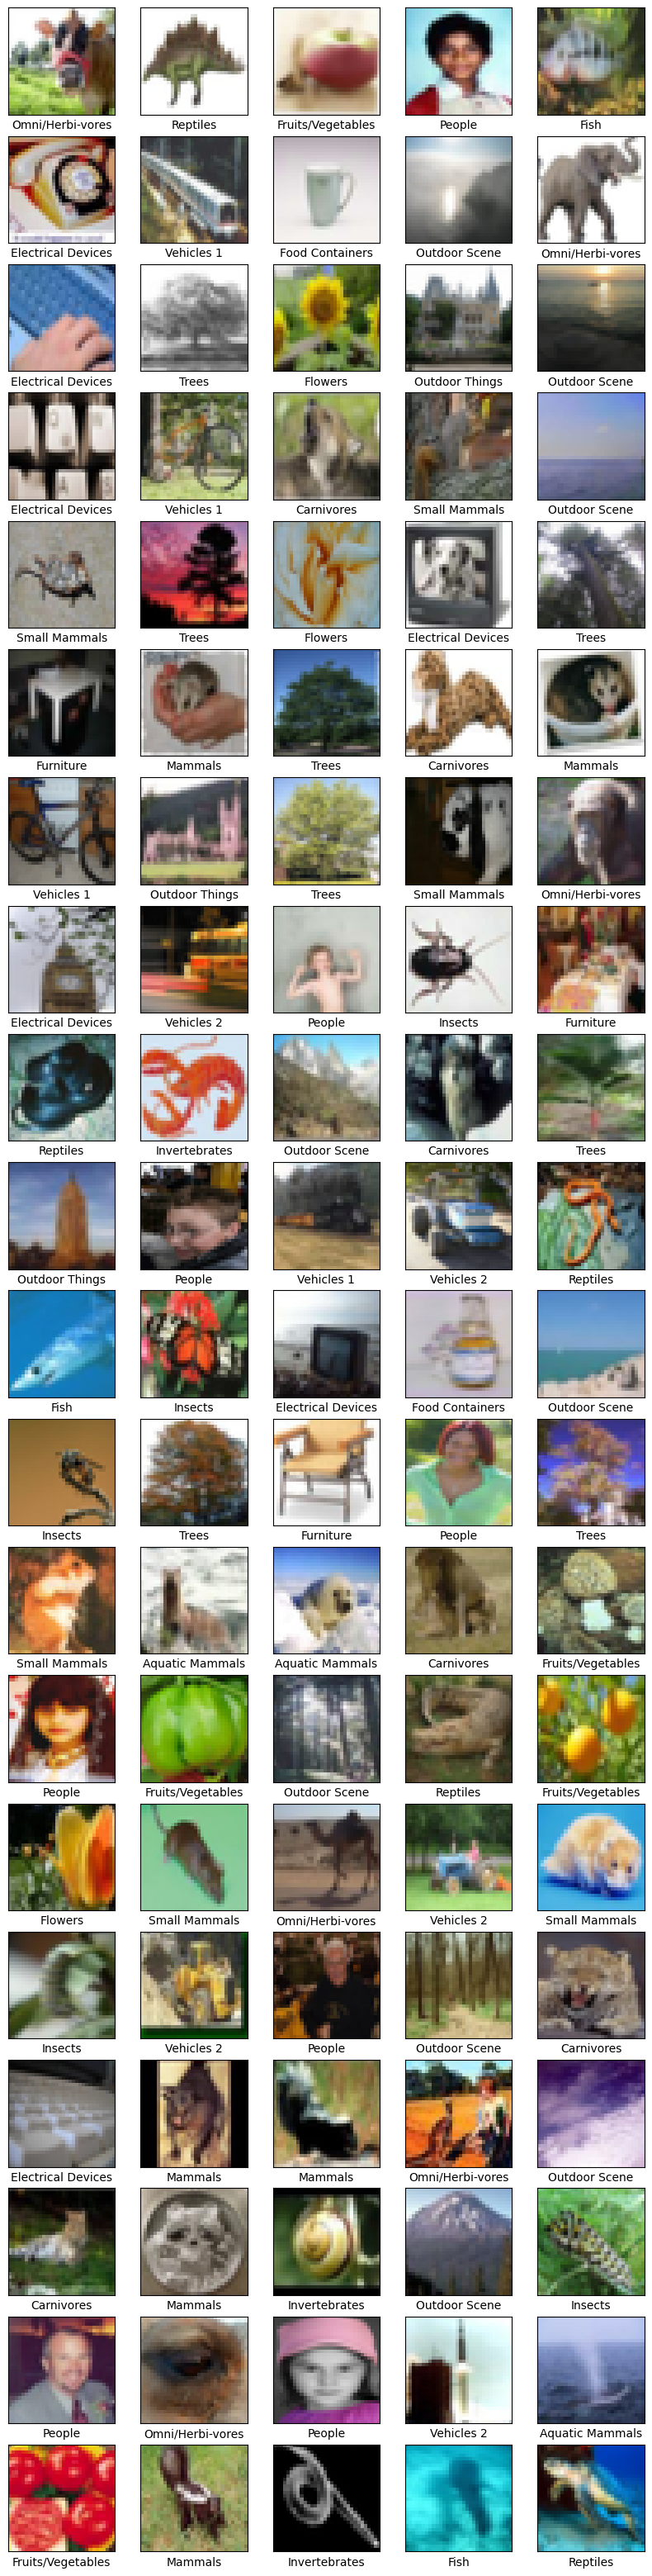

In [ ]:
plt.figure(figsize=(10,40))

rows = 20
columns = 5

for i in range(rows*columns):
    plt.subplot(rows,columns,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

# **ANN Architecture-1**

In [ ]:
#Building Model

model1 = models.Sequential()

model1.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model1.add(layers.MaxPool2D((2,2)))

model1.add(layers.Conv2D(64, (3,3), activation='relu'))
model1.add(layers.MaxPool2D((2,2)))

model1.add(layers.Conv2D(64, (3,3), activation='relu'))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

In [ ]:
model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dense(20))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model1.compile(optimizer='adam',
               loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [ ]:
history1 = model1.fit(train_images, train_labels,epochs=10, validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 19s 5ms/step - loss: 2.4191 - accuracy: 0.2515 - val_loss: 2.1551 - val_accuracy: 0.3331
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0373 - accuracy: 0.3662 - val_loss: 1.9746 - val_accuracy: 0.3912
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8595 - accuracy: 0.4197 - val_loss: 1.8533 - val_accuracy: 0.4246
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7302 - accuracy: 0.4601 - val_loss: 1.7714 - val_accuracy: 0.4510
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6347 - accuracy: 0.4861 - val_loss: 1.7656 - val_accuracy: 0.4540
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5512 - accuracy: 0.5111 - val_loss: 1.6820 - val_accuracy: 0.4827
Epoch 7/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.4811 - accuracy: 0.5317 - val_loss: 1.7110 - val_accuracy

313/313 - 1s - loss: 1.6889 - accuracy: 0.4888 - 654ms/epoch - 2ms/step


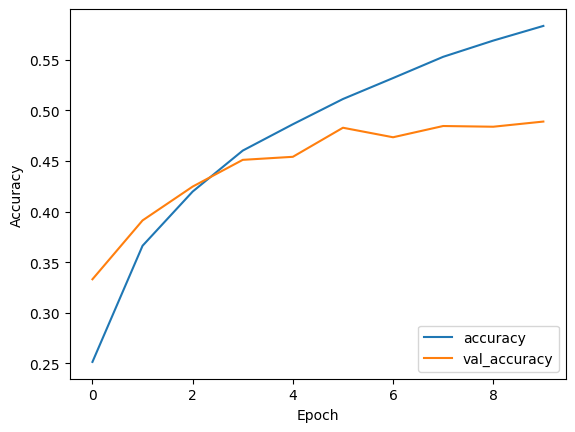

In [ ]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss, test_acc = model1.evaluate(test_images, test_labels, verbose=2)

In [ ]:
#Testing Accuracy:
test_loss, test_acc = model1.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.6889 - accuracy: 0.4888


In [ ]:
#Training Accuraccy:
train_loss, train_acc = model1.evaluate(train_images, train_labels)

1563/1563 [==============================] - 5s 3ms/step - loss: 1.2088 - accuracy: 0.6182


In [ ]:
predictions = model1.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([ 2.7202852 ,  0.27570042, -4.6182175 , -6.4594116 , -6.783529  ,
       -3.5949595 , -4.285302  ,  0.40204054, -3.5854032 ,  2.2479148 ,
       -0.5483314 , -2.6872234 , -2.5621753 ,  1.3595078 , -2.923281  ,
        0.6270034 , -2.7887585 ,  0.6640995 ,  0.6606347 ,  3.0050845 ],
      dtype=float32)

In [ ]:
np.argmax(predictions[0])

19

In [ ]:
test_labels[0]

array([10])

# **ANN Architecture-2**

In [ ]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.Conv2D(64, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Conv2D(128,(3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Conv2D(128, (3,3), activation='relu'))
model2.add(layers.Conv2D(256, (3,3), activation='relu'))
model2.add(layers.MaxPooling2D((2,2)))

model2.add(layers.Flatten())
model2.add(layers.Dense(256,activation='relu'))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(20))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 128)        

In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(train_images, train_labels, epochs=10, validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 14s 7ms/step - loss: 2.6120 - accuracy: 0.1799 - val_loss: 2.3664 - val_accuracy: 0.2599
Epoch 2/10
1563/1563 [==============================] - 10s 6ms/step - loss: 2.2560 - accuracy: 0.2939 - val_loss: 2.1548 - val_accuracy: 0.3317
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 2.0511 - accuracy: 0.3588 - val_loss: 2.0290 - val_accuracy: 0.3678
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.9046 - accuracy: 0.4033 - val_loss: 1.9309 - val_accuracy: 0.3948
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7827 - accuracy: 0.4395 - val_loss: 1.8430 - val_accuracy: 0.4264
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6794 - accuracy: 0.4690 - val_loss: 1.7827 - val_accuracy: 0.4420
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5910 - accuracy: 0.4966 - val_loss: 1.7420 - val_ac

313/313 - 1s - loss: 1.7492 - accuracy: 0.4622 - 877ms/epoch - 3ms/step


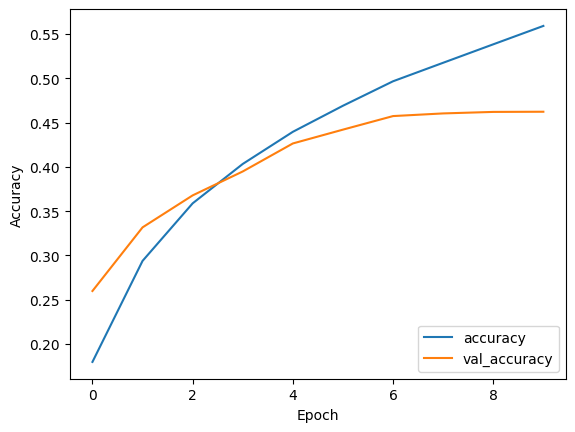

In [ ]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(test_images, test_labels, verbose=2)

In [ ]:
#Testing accuracy:
test_loss, test_acc = model2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.7492 - accuracy: 0.4622


In [ ]:
#Training Accuracy
train_loss, train_acc = model2.evaluate(train_images, train_labels)

1563/1563 [==============================] - 6s 4ms/step - loss: 1.2693 - accuracy: 0.5897


In [ ]:
#Making Predictions on the testing data
predictions = model2.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[0]

array([-0.617723  ,  0.48768   , -2.5851278 , -2.3594024 , -1.5149713 ,
       -2.389062  , -1.9984983 , -1.3410754 , -1.9936126 , -0.19172269,
       -2.1220458 , -0.76373076, -1.9715796 , -0.37089866,  0.6674386 ,
       -0.20822558, -2.9818425 , -2.552942  , -0.10022524, -0.13363075],
      dtype=float32)

In [ ]:
import numpy as np
np.argmax(predictions[0])

14

In [ ]:
test_labels[0]

array([10])

# **Model Tuning Method-1**

In [ ]:
import tensorflow as tf
from tensorflow import keras
!pip install -q -U keras-tuner
import keras_tuner as kta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
from keras import layers
from keras.layers import BatchNormalization
from keras import regularizers

def model_builder(hp):
  model = keras.Sequential()
  #adding input layer
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(keras.layers.Flatten())

  #tune the no of units in the first Dense Layer
  #choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512)
  model.add(keras.layers.Dense(units=hp_units, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  #model.add(BatchNormalization())   #updated
  model.add(keras.layers.Dropout(0.5))  #updated

  model.add(keras.layers.Dense(20)) #output layer

  #tune the learning rate for the optimizer
  #choose an ptimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2,1e-3,1e-4])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp_learning_rate),
                loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  return model

In [ ]:
tuner = kt.Hyperband(model_builder,objective='val_accuracy',
                   max_epochs=10,
                   factor=4,overwrite=True,
                   directory='my_dir',
                   project_name='intro_to_kt')

In [ ]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
tuner.search(train_images,train_labels,epochs=50,validation_split=0.2,callbacks=[stop_early])

Trial 11 Complete [00h 01m 24s]
val_accuracy: 0.2833999991416931

Best val_accuracy So Far: 0.3391999900341034
Total elapsed time: 00h 11m 08s


In [ ]:
#Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(best_hps.get('units'))
print(best_hps.get('learning_rate'))

498
0.0001


In [ ]:
model = tuner.hypermodel.build(best_hps)
newmodel = model.fit(train_images,train_labels, epochs=50, validation_split=0.2)

val_acc_per_epoch = newmodel.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch))+1
print('Best epoch: %d'%(best_epoch,))

Epoch 1/50
1250/1250 [==============================] - 12s 8ms/step - loss: 3.6962 - accuracy: 0.1613 - val_loss: 2.7044 - val_accuracy: 0.2142
Epoch 2/50
1250/1250 [==============================] - 9s 7ms/step - loss: 2.6881 - accuracy: 0.2099 - val_loss: 2.5785 - val_accuracy: 0.2458
Epoch 3/50
1250/1250 [==============================] - 10s 8ms/step - loss: 2.6218 - accuracy: 0.2244 - val_loss: 2.5303 - val_accuracy: 0.2774
Epoch 4/50
1250/1250 [==============================] - 9s 7ms/step - loss: 2.5895 - accuracy: 0.2375 - val_loss: 2.5134 - val_accuracy: 0.2758
Epoch 5/50
1250/1250 [==============================] - 9s 7ms/step - loss: 2.5663 - accuracy: 0.2443 - val_loss: 2.4784 - val_accuracy: 0.2892
Epoch 6/50
1250/1250 [==============================] - 9s 7ms/step - loss: 2.5473 - accuracy: 0.2510 - val_loss: 2.4683 - val_accuracy: 0.2899
Epoch 7/50
1250/1250 [==============================] - 10s 8ms/step - loss: 2.5268 - accuracy: 0.2577 - val_loss: 2.4393 - val_accura

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)
history3 = hypermodel.fit(train_images, train_labels, epochs=best_epoch, validation_split=0.2, validation_data=(test_images,test_labels))

Epoch 1/47
1563/1563 [==============================] - 14s 8ms/step - loss: 3.4552 - accuracy: 0.1929 - val_loss: 2.6397 - val_accuracy: 0.2521
Epoch 2/47
1563/1563 [==============================] - 12s 8ms/step - loss: 2.6453 - accuracy: 0.2358 - val_loss: 2.5478 - val_accuracy: 0.2867
Epoch 3/47
1563/1563 [==============================] - 12s 8ms/step - loss: 2.5928 - accuracy: 0.2526 - val_loss: 2.5237 - val_accuracy: 0.2797
Epoch 4/47
1563/1563 [==============================] - 12s 8ms/step - loss: 2.5562 - accuracy: 0.2660 - val_loss: 2.4742 - val_accuracy: 0.2971
Epoch 5/47
1563/1563 [==============================] - 13s 8ms/step - loss: 2.5244 - accuracy: 0.2733 - val_loss: 2.4649 - val_accuracy: 0.3069
Epoch 6/47
1563/1563 [==============================] - 13s 8ms/step - loss: 2.5092 - accuracy: 0.2828 - val_loss: 2.4352 - val_accuracy: 0.3231
Epoch 7/47
1563/1563 [==============================] - 12s 8ms/step - loss: 2.4892 - accuracy: 0.2906 - val_loss: 2.4198 - val_ac

In [ ]:
eval_result = hypermodel.evaluate(test_images,test_labels)
print('[test_loss, test_accuracy]:',eval_result)

313/313 [==============================] - 1s 3ms/step - loss: 2.2417 - accuracy: 0.3935
[test_loss, test_accuracy]: [2.241664171218872, 0.3935000002384186]


In [ ]:
predictions = hypermodel.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[10]

array([-1.6451224 , -0.08136299, -1.2315496 ,  1.3884146 , -3.085391  ,
        1.9365611 , -0.1335884 , -3.8690689 , -2.147473  ,  0.2588237 ,
       -0.9905716 , -1.6179271 , -1.1989387 , -1.6966249 , -0.4380862 ,
       -0.99843216, -1.0870012 , -5.2693706 ,  0.04633858, -1.401859  ],
      dtype=float32)

In [ ]:
np.argmax(predictions[0])

10

In [ ]:
test_labels[0]

array([10])

313/313 - 1s - loss: 2.2417 - accuracy: 0.3935 - 761ms/epoch - 2ms/step


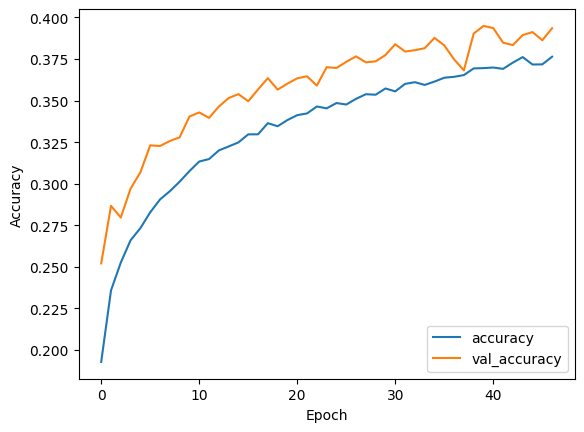

In [ ]:
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss, test_acc = hypermodel.evaluate(test_images, test_labels, verbose=2)

In [2]:
import tensorflow as tf
from tensorflow import keras
!pip install -q -U keras-tuner
#!pip install --upgrade protobuf
#!pip install -U keras-tuner
import keras_tuner as kt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
!pip install -q -U keras-tuner
import keras_tuner as kta